In [1]:
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

import sqlite3
import pandas as pd
import numpy as np
import nltk
import string
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from nltk.stem.porter import PorterStemmer

import re
# Tutorial about Python regular expressions: https://pymotw.com/2/re/
import string
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from nltk.stem.wordnet import WordNetLemmatizer


import pickle

from tqdm import tqdm
import os




In [2]:
import plotly
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot

In [3]:
from gensim.models import Word2Vec
from gensim.models import KeyedVectors

In [4]:
data  = pd.read_csv('preprocessed_data.csv', nrows=50000)
data.head(5)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,project_is_approved,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,1,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05
1,ut,ms,grades_3_5,4,1,specialneeds,specialneeds,imagine 8 9 years old you third grade classroo...,213.03
2,ca,mrs,grades_prek_2,10,1,literacy_language,literacy,having class 24 students comes diverse learner...,329.00
3,ga,mrs,grades_prek_2,2,1,appliedlearning,earlydevelopment,i recently read article giving students choice...,481.04
4,wa,mrs,grades_3_5,2,1,literacy_language,literacy,my students crave challenge eat obstacles brea...,17.74


In [5]:
y = data['project_is_approved'].values
X = data.drop(['project_is_approved'], axis=1)
X.head(1)

,school_state,teacher_prefix,project_grade_category,teacher_number_of_previously_posted_projects,clean_categories,clean_subcategories,essay,price
0,ca,mrs,grades_prek_2,53,math_science,appliedsciences health_lifescience,i fortunate enough use fairy tale stem kits cl...,725.05


In [6]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, stratify=y)
X_train, X_cv, y_train, y_cv = train_test_split(X_train, y_train, test_size=0.33, stratify=y_train)

In [7]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer1 = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=10000)
vectorizer1.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_bow = vectorizer1.transform(X_train['essay'].values)
x_cv_essay_bow = vectorizer1.transform(X_cv['essay'].values)
x_test_essay_bow = vectorizer1.transform(X_test['essay'].values)

print("After vectorizations")
print(x_train_essay_bow.shape, y_train.shape)
print(x_cv_essay_bow.shape, y_cv.shape)
print(x_test_essay_bow.shape, y_test.shape)
print("="*100)


(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
After vectorizations
(22445, 10000) (22445,)
(11055, 10000) (11055,)
(16500, 10000) (16500,)


In [8]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer2 = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
vectorizer2.fit(X_train['essay'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_essay_tfidf = vectorizer2.transform(X_train['essay'].values)
x_cv_essay_tfidf = vectorizer2.transform(X_cv['essay'].values)
x_test_essay_tfidf = vectorizer2.transform(X_test['essay'].values)

print("After vectorizations")
print(x_train_essay_tfidf.shape, y_train.shape)
print(x_cv_essay_tfidf.shape, y_cv.shape)
print(x_test_essay_tfidf.shape, y_test.shape)
print("="*100)


(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)
After vectorizations
(22445, 20000) (22445,)
(11055, 20000) (11055,)
(16500, 20000) (16500,)


In [9]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = CountVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data

(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)


CountVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=10,
        ngram_range=(1, 4), preprocessor=None, stop_words=None,
        strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
        tokenizer=None, vocabulary=None)

In [10]:
print(X_train.shape, y_train.shape)
print(X_cv.shape, y_cv.shape)
print(X_test.shape, y_test.shape)

print("="*100)


vectorizer = TfidfVectorizer(min_df=10,ngram_range=(1,4), max_features=20000)
vectorizer.fit(X_train['essay'].values) # fit has to happen only on train data


(22445, 8) (22445,)
(11055, 8) (11055,)
(16500, 8) (16500,)


TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
        dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
        lowercase=True, max_df=1.0, max_features=20000, min_df=10,
        ngram_range=(1, 4), norm='l2', preprocessor=None, smooth_idf=True,
        stop_words=None, strip_accents=None, sublinear_tf=False,
        token_pattern='(?u)\\b\\w\\w+\\b', tokenizer=None, use_idf=True,
        vocabulary=None)

In [11]:
vectorizer3 = CountVectorizer()
vectorizer3.fit(X_train['school_state'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_state_ohe = vectorizer3.transform(X_train['school_state'].values)
x_cv_state_ohe = vectorizer3.transform(X_cv['school_state'].values)
x_test_state_ohe = vectorizer3.transform(X_test['school_state'].values)

print("After vectorizations")
print(x_train_state_ohe.shape, y_train.shape)
print(x_cv_state_ohe.shape, y_cv.shape)
print(x_test_state_ohe.shape, y_test.shape)
print(vectorizer3.get_feature_names())
print("="*100)

After vectorizations
(22445, 51) (22445,)
(11055, 51) (11055,)
(16500, 51) (16500,)
['ak', 'al', 'ar', 'az', 'ca', 'co', 'ct', 'dc', 'de', 'fl', 'ga', 'hi', 'ia', 'id', 'il', 'in', 'ks', 'ky', 'la', 'ma', 'md', 'me', 'mi', 'mn', 'mo', 'ms', 'mt', 'nc', 'nd', 'ne', 'nh', 'nj', 'nm', 'nv', 'ny', 'oh', 'ok', 'or', 'pa', 'ri', 'sc', 'sd', 'tn', 'tx', 'ut', 'va', 'vt', 'wa', 'wi', 'wv', 'wy']


In [12]:
vectorizer4 = CountVectorizer()
vectorizer4.fit(X_train['teacher_prefix'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_teacher_ohe = vectorizer4.transform(X_train['teacher_prefix'].values)
x_cv_teacher_ohe = vectorizer4.transform(X_cv['teacher_prefix'].values)
x_test_teacher_ohe = vectorizer4.transform(X_test['teacher_prefix'].values)

print("After vectorizations")
print(x_train_teacher_ohe.shape, y_train.shape)
print(x_cv_teacher_ohe.shape, y_cv.shape)
print(x_test_teacher_ohe.shape, y_test.shape)
print(vectorizer4.get_feature_names())
print("="*100)

After vectorizations
(22445, 5) (22445,)
(11055, 5) (11055,)
(16500, 5) (16500,)
['dr', 'mr', 'mrs', 'ms', 'teacher']


In [13]:
vectorizer5 = CountVectorizer()
vectorizer5.fit(X_train['project_grade_category'].values) # fit has to happen only on train data

# we use the fitted CountVectorizer to convert the text to vector
x_train_grade_ohe = vectorizer5.transform(X_train['project_grade_category'].values)
x_cv_grade_ohe = vectorizer5.transform(X_cv['project_grade_category'].values)
x_test_grade_ohe = vectorizer5.transform(X_test['project_grade_category'].values)

print("After vectorizations")
print(x_train_grade_ohe.shape, y_train.shape)
print(x_cv_grade_ohe.shape, y_cv.shape)
print(x_test_grade_ohe.shape, y_test.shape)
print(vectorizer5.get_feature_names())
print("="*100)

After vectorizations
(22445, 4) (22445,)
(11055, 4) (11055,)
(16500, 4) (16500,)
['grades_3_5', 'grades_6_8', 'grades_9_12', 'grades_prek_2']


In [14]:
from sklearn.preprocessing import Normalizer
normalizer = Normalizer()
# normalizer.fit(X_train['price'].values)
# this will rise an error Expected 2D array, got 1D array instead: 
# array=[105.22 215.96  96.01 ... 368.98  80.53 709.67].
# Reshape your data either using 
# array.reshape(-1, 1) if your data has a single feature 
# array.reshape(1, -1)  if it contains a single sample.
normalizer.fit(X_train['price'].values.reshape(1,-1))

x_train_price_norm = normalizer.transform(X_train['price'].values.reshape(1,-1)).reshape(-1,1)
x_cv_price_norm = normalizer.transform(X_cv['price'].values.reshape(1,-1)).reshape(-1,1)
x_test_price_norm = normalizer.transform(X_test['price'].values.reshape(1,-1)).reshape(-1,1)

print("After vectorizations")
print(x_train_price_norm.shape, y_train.shape)
print(x_cv_price_norm.shape, y_cv.shape)
print(x_test_price_norm.shape, y_test.shape)
print("="*100)


After vectorizations
(22445, 1) (22445,)
(11055, 1) (11055,)
(16500, 1) (16500,)


In [15]:
from scipy.sparse import hstack
x_tr1 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_train_essay_bow)).tocsr()
x_cv1 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,x_cv_essay_bow)).tocsr()
x_te1 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,x_test_essay_bow)).tocsr()

print("Final Data matrix")
print(x_tr1.shape, y_train.shape)
print(x_cv1.shape, y_cv.shape)
print(x_te1.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 10061) (22445,)
(11055, 10061) (11055,)
(16500, 10061) (16500,)


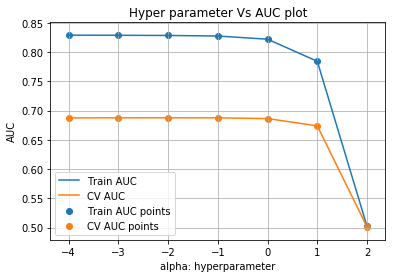

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.093737,0.029566,0.687548,0.829080,0.0001,{'alpha': 0.0001},4,0.683895,0.829539,0.682681,0.826639,0.696069,0.831063,1.882763e-02,2.412225e-02,0.006045,0.001835
1,0.074071,0.012011,0.687712,0.828865,0.001,{'alpha': 0.001},2,0.684653,0.829156,0.682579,0.826529,0.695904,0.830909,3.371748e-07,2.247832e-07,0.005854,0.001800
2,0.076408,0.012351,0.687779,0.828532,0.01,{'alpha': 0.01},1,0.685316,0.828614,0.682390,0.826352,0.695631,0.830630,3.684938e-03,4.799122e-04,0.005679,0.001748
3,0.075740,0.012680,0.687641,0.827608,0.1,{'alpha': 0.1},3,0.685647,0.827415,0.682081,0.825673,0.695196,0.829735,3.776358e-03,9.449885e-04,0.005537,0.001664
4,0.080077,0.013347,0.686443,0.822147,1,{'alpha': 1},5,0.684333,0.821641,0.681163,0.820705,0.693832,0.824095,3.564127e-03,1.248701e-03,0.005383,0.001430


In [16]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import randint as sp_randint
nb=MultinomialNB()
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
params = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100]}
clf1 = GridSearchCV(nb, params, cv=3, scoring='roc_auc')
clf1.fit(x_tr1, y_train)

results = pd.DataFrame.from_dict(clf1.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha_values =  results['param_alpha']

plt.plot(np.log10(alpha), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(np.log10(alpha), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(np.log10(alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(alpha), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

In [17]:
from scipy.sparse import hstack
x_tr2 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_train_essay_tfidf)).tocsr()
x_cv2 = hstack((x_cv_state_ohe,x_cv_teacher_ohe,x_cv_grade_ohe,x_cv_price_norm,x_cv_essay_tfidf)).tocsr()
x_te2 = hstack((x_test_state_ohe,x_test_teacher_ohe,x_test_grade_ohe,x_test_price_norm,x_test_essay_tfidf)).tocsr()

print("Final Data matrix")
print(x_tr2.shape, y_train.shape)
print(x_cv2.shape, y_cv.shape)
print(x_te2.shape, y_test.shape)
print("="*100)

Final Data matrix
(22445, 20061) (22445,)
(11055, 20061) (11055,)
(16500, 20061) (16500,)


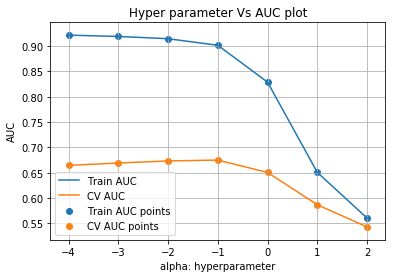

,mean_fit_time,mean_score_time,mean_test_score,mean_train_score,param_alpha,params,rank_test_score,split0_test_score,split0_train_score,split1_test_score,split1_train_score,split2_test_score,split2_train_score,std_fit_time,std_score_time,std_test_score,std_train_score
0,0.101529,0.017391,0.664492,0.921587,0.0001,{'alpha': 0.0001},4,0.659843,0.921876,0.664225,0.920959,0.669410,0.921925,0.005698,0.002389,0.003910,0.000444
1,0.098428,0.017016,0.669200,0.919034,0.001,{'alpha': 0.001},3,0.664261,0.919183,0.668372,0.918341,0.674968,0.919578,0.014650,0.004247,0.004410,0.000516
2,0.103768,0.019018,0.673210,0.914529,0.01,{'alpha': 0.01},2,0.668344,0.914471,0.671505,0.913724,0.679783,0.915391,0.017948,0.007078,0.004823,0.000682
3,0.091423,0.014012,0.674971,0.901588,0.1,{'alpha': 0.1},1,0.670046,0.901121,0.671582,0.900889,0.683285,0.902755,0.002057,0.000817,0.005912,0.000830
4,0.098763,0.019017,0.650487,0.828752,1,{'alpha': 1},5,0.640838,0.828318,0.648807,0.830116,0.661819,0.827822,0.013684,0.003746,0.008648,0.000986


In [18]:
# https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB
from scipy.stats import randint as sp_randint
nb=MultinomialNB()
alpha=[0.0001,0.001,0.01,0.1,1,10,100]
params = {'alpha': [0.0001,0.001,0.01,0.1,1,10,100]}
clf2 = GridSearchCV(nb, params, cv=3, scoring='roc_auc')
clf2.fit(x_tr2, y_train)

results = pd.DataFrame.from_dict(clf2.cv_results_)
results = results.sort_values(['param_alpha'])

train_auc= results['mean_train_score']
train_auc_std= results['std_train_score']
cv_auc = results['mean_test_score'] 
cv_auc_std= results['std_test_score']
alpha_values =  results['param_alpha']

plt.plot(np.log10(alpha), train_auc, label='Train AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, train_auc - train_auc_std,train_auc + train_auc_std,alpha=0.2,color='darkblue')

plt.plot(np.log10(alpha), cv_auc, label='CV AUC')
# this code is copied from here: https://stackoverflow.com/a/48803361/4084039
# plt.gca().fill_between(K, cv_auc - cv_auc_std,cv_auc + cv_auc_std,alpha=0.2,color='darkorange')

plt.scatter(np.log10(alpha), train_auc, label='Train AUC points')
plt.scatter(np.log10(alpha), cv_auc, label='CV AUC points')


plt.legend()
plt.xlabel("alpha: hyperparameter")
plt.ylabel("AUC")
plt.title("Hyper parameter Vs AUC plot")
plt.grid()
plt.show()

results.head()

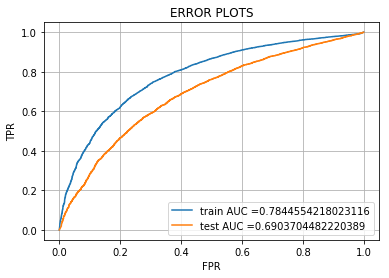

In [19]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc
import math
best_alpha=2
mlnb = MultinomialNB(alpha=best_alpha)
mlnb.fit(x_tr1, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = mlnb.predict_proba(x_tr1)[:,1] 
y_test_pred = mlnb.predict_proba(x_te1)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

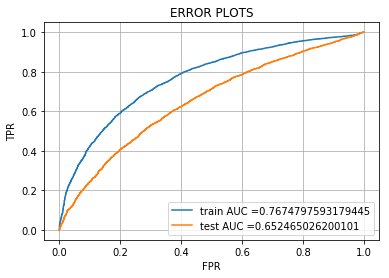

In [20]:
# https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve
from sklearn.metrics import roc_curve, auc

best_alpha=2
mlnb = MultinomialNB(alpha=best_alpha)
mlnb.fit(x_tr2, y_train)
# roc_auc_score(y_true, y_score) the 2nd parameter should be probability estimates of the positive class
# not the predicted outputs

y_train_pred = mlnb.predict_proba(x_tr2)[:,1] 
y_test_pred = mlnb.predict_proba(x_te2)[:,1] 

train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)

plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("ERROR PLOTS")
plt.grid()
plt.show()

In [21]:
# we are writing our own function for predict, with defined thresould
# we will pick a threshold that will give the least fpr
def find_best_threshold(threshould, fpr, tpr):
    t = threshould[np.argmax(tpr*(1-fpr))]
    # (tpr*(1-fpr)) will be maximum if your fpr is very low and tpr is very high
    print("the maximum value of tpr*(1-fpr)", max(tpr*(1-fpr)), "for threshold", np.round(t,3))
    return t

def predict_with_best_t(proba, threshould):
    predictions = []
    for i in proba:
        if i>=threshould:
            predictions.append(1)
        else:
            predictions.append(0)
    return predictions


In [22]:
print("="*100)
from sklearn.metrics import confusion_matrix
best_t = find_best_threshold(tr_thresholds, train_fpr, train_tpr)
print("Train confusion matrix")
print(confusion_matrix(y_train, predict_with_best_t(y_train_pred, best_t)))
print("Test confusion matrix")
print(confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t)))

the maximum value of tpr*(1-fpr) 0.496139200112151 for threshold 0.964
Train confusion matrix
[[ 2555  1040]
 [ 5691 13159]]
Test confusion matrix
[[1409 1233]
 [4378 9480]]


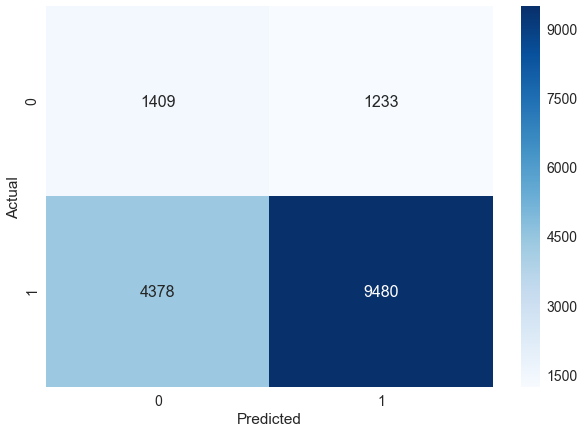

In [32]:
from sklearn.metrics import confusion_matrix
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
data = confusion_matrix(y_test, predict_with_best_t(y_test_pred, best_t))
df_cm = pd.DataFrame(data, columns=np.unique(y_test), index = np.unique(y_test))
df_cm.index.name = 'Actual'
df_cm.columns.name = 'Predicted'
plt.figure(figsize = (10,7))
sn.set(font_scale=1.4)#for label size
sn.heatmap(df_cm, cmap="Blues", annot=True,annot_kws={"size": 16},fmt='g')# font size

In [30]:
#to find top 20 negative and positive features of categoryset1 labeled as x_tr1
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
clf.fit(x_tr1,y_train)
x_tr1 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_train_essay_bow)).tocsr()

stacked_feature_names1=[]
stacked_feature_names1.extend(vectorizer3.get_feature_names())
stacked_feature_names1.extend(vectorizer4.get_feature_names())
stacked_feature_names1.extend(vectorizer5.get_feature_names())
stacked_feature_names1.extend("price")
stacked_feature_names1.extend(vectorizer1.get_feature_names())
len(clf.feature_log_prob_[0,:1]),len(stacked_feature_names1),len(clf.feature_log_prob_[1,:])
max_ind_neg=np.argsort(((clf.feature_log_prob_)[0])[::-1])
#max_ind_neg=np.argsort(((clf1.feature_log_prob_)[0])[::-1][0:10])
max_ind_neg = max_ind_neg [:20]  
                       
top_neg=np.take(stacked_feature_names1,max_ind_neg)
#max_ind_pos=np.argsort(((clf1.feature_log_prob_)[1])[::-1][0:10])
max_ind_pos=np.argsort(((clf.feature_log_prob_)[1])[::-1])
max_ind_pos = max_ind_pos [:20 ] 
                       
top_pos=np.take(stacked_feature_names1,max_ind_pos)
print(top_neg)
print(max_ind_neg)
print(top_pos)
print(max_ind_pos)


['year the' 'the classroom' 'can imagine' 'freedom' 'students'
 'high poverty school district' 'better oxygen' 'the book' 'colleges'
 'dual' 'disabilities including' 'yoga ball' 'town' 'total' 'precious'
 'exposure' 'students interact' 'academic achievement' 'approach'
 'provide necessary']
[10009  8792  1203  3202  7902  3794   978  8785  1614  2354  2219 10032
  9234  9229  6412  2864  8181   282   633  6567]
['year the' 'year these' 'year we' 'yoga ball' 'yoga mats' 'yearbook'
 'yoga' 'burn' 'yet students' 'years' 'strength' 'use class'
 'the students able' 'skills work' 'students learn read' 'makes learning'
 'extend learning' 'students going' 'they get' 'shaped']
[10009 10010 10014 10032 10034 10019 10031  1157 10030 10021  7843  9383
  8841  7555  8198  5046  2872  8143  8954  7415]


In [31]:
#to find top 20 negative and positive features of categoryset2 labeled as x_tr2
from sklearn.naive_bayes import MultinomialNB
clf=MultinomialNB()
x_tr2 = hstack((x_train_state_ohe,x_train_teacher_ohe,x_train_grade_ohe,x_train_price_norm,x_train_essay_tfidf)).tocsr()
clf.fit(x_tr1,y_train)
stacked_feature_names2=[]
stacked_feature_names2.extend(vectorizer3.get_feature_names())
stacked_feature_names2.extend(vectorizer4.get_feature_names())
stacked_feature_names2.extend(vectorizer5.get_feature_names())
stacked_feature_names2.extend("price")
stacked_feature_names2.extend(vectorizer2.get_feature_names())
len(clf.feature_log_prob_[0,:1]),len(stacked_feature_names1),len(clf.feature_log_prob_[1,:])
#max_ind_neg=np.argsort(((clf2.feature_log_prob_)[0])[::-1][0:10])
max_ind_neg=np.argsort(((clf.feature_log_prob_)[0])[::-1])
max_ind_neg = max_ind_neg [:20]  

top_neg=np.take(stacked_feature_names2,max_ind_neg)
#max_ind_pos=np.argsort(((clf2.feature_log_prob_)[1])[::-1][0:10])
max_ind_pos=np.argsort(((clf.feature_log_prob_)[1])[::-1])
max_ind_pos = max_ind_pos [:20 ] 

top_pos=np.take(stacked_feature_names2,max_ind_pos)
print(top_neg)
print(max_ind_neg)
print(top_pos)
print(max_ind_pos)

['many levels' 'learn think' 'arriving' 'come urban'
 'independent learners' 'cut' 'always looking new' 'learn these'
 'become proficient' 'chair' 'came' 'many questions' 'license'
 'library students' 'get books' 'classroom many' 'it allow students'
 '900 students' 'activities the' 'glue sticks']
[10009  8792  1203  3202  7902  3794   978  8785  1614  2354  2219 10032
  9234  9229  6412  2864  8181   282   633  6567]
['many levels' 'many little' 'many many' 'many questions'
 'many raised single' 'many not' 'many projects' 'areas' 'many programs'
 'many obstacles' 'income homes' 'listen stories' 'learners love'
 'hopeful' 'it give' 'enjoyed' 'classroom my'
 'involve learn benjamin franklin' 'learning hands' 'high standards']
[10009 10010 10014 10032 10034 10019 10031  1157 10030 10021  7843  9383
  8841  7555  8198  5046  2872  8143  8954  7415]


In [33]:
from prettytable import PrettyTable as pt
x=pt()
x.field_names = ["Vectorizer", "Model", "Hyper Parameter=best_alpha", "AUC"]
x.add_row(["BOW","Brute",0.44,0.69])
x.add_row(["TFIDF","Brute",0.56,0.65])
print(x)

+------------+-------+----------------------------+------+
| Vectorizer | Model | Hyper Parameter=best_alpha | AUC  |
+------------+-------+----------------------------+------+
|    BOW     | Brute |            0.44            | 0.69 |
|   TFIDF    | Brute |            0.56            | 0.65 |
+------------+-------+----------------------------+------+
